# Total Segmentator Dataset Exploration and Visualisation

In [45]:
COLAB = False

if COLAB:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

from IPython.display import HTML
import pyvista as pv

import os
from utils.filepaths import *

from eval.metrics import *
from utils.data_processing import *
from utils.data_viz import *
from utils.data_geometry import *

%matplotlib inline

In [46]:

HOME = os.getcwd()
os.chdir(HOME)

DATA_PATH = TOTAL_SEGM_PATH
PREDICTIONS_PATH = f"{HOME}/Predictions"

print("HOME: ", HOME)
print("DATA_PATH: ", DATA_PATH)
print("PREDICTIONS_PATH: ", PREDICTIONS_PATH)


HOME:  /home/catarina/Documents/GitHub/med_seg_study
DATA_PATH:  /media/catarina/SHARGE DISK/Totalsegmentator_dataset_V201
PREDICTIONS_PATH:  /home/catarina/Documents/GitHub/med_seg_study/Predictions


## 3D Reconstruction from CT Scan Mask

In [47]:
dataset = "Totalsegmentator_dataset_v201"
patient_ID = "s0001"
organ = "colon"

ct_scan_filepath = os.path.join(DATA_PATH, patient_ID, "ct.nii.gz")
ct_scan_output_path = os.path.join(HOME, "outputs", "gifs",  f"{patient_ID}_ct.gif" )

mask_filepath = os.path.join(DATA_PATH, patient_ID, "segmentations", f"{organ}.nii.gz")
output_mask_filepath = os.path.join(HOME, "outputs", "gifs",  f"{patient_ID}_{organ}.gif")

In [52]:
%matplotlib widget
GENERATE_GIF = False
ct_scan_gif = [ generate_gif(ct_scan_filepath, output_filepath=ct_scan_output_path) if GENERATE_GIF else ct_scan_output_path ][0] 
print(ct_scan_gif)
visualize_gif(ct_scan_gif)

/home/catarina/Documents/GitHub/med_seg_study/outputs/gifs/s0001_ct.gif


In [49]:
mesh = generate_3d_reconstruction(mask_filepath, id=patient_ID);
reconstruction_path_GT = visualize_mesh(mesh, mask_filepath, id=patient_ID, opacity=1);

Saving mesh to /home/catarina/Documents/GitHub/med_seg_study/outputs/mesh/s0001/colon.nii.gz.obj
Saving mesh to /home/catarina/Documents/GitHub/med_seg_study/outputs/3d_reconstruction/s0001/colon.nii.gz.html


Widget(value='<iframe src="http://localhost:41233/index.html?ui=P_0x776ce43bacc0_4&reconnect=auto" class="pyvi…

In [53]:
dataset = "Totalsegmentator_dataset_v201"
patient_ID = "s0004"
organ = "colon"

ct_filepath = os.path.join(DATA_PATH, patient_ID, "ct.nii.gz")
ct_output_filepath = os.path.join(HOME, "outputs", "gifs",  f"{patient_ID}_ct.gif" )

mask_filepath = os.path.join(DATA_PATH, patient_ID, "segmentations", f"{organ}.nii.gz")
output_mask_filepath = os.path.join(HOME, "outputs", "gifs",  f"{patient_ID}_{organ}.gif")


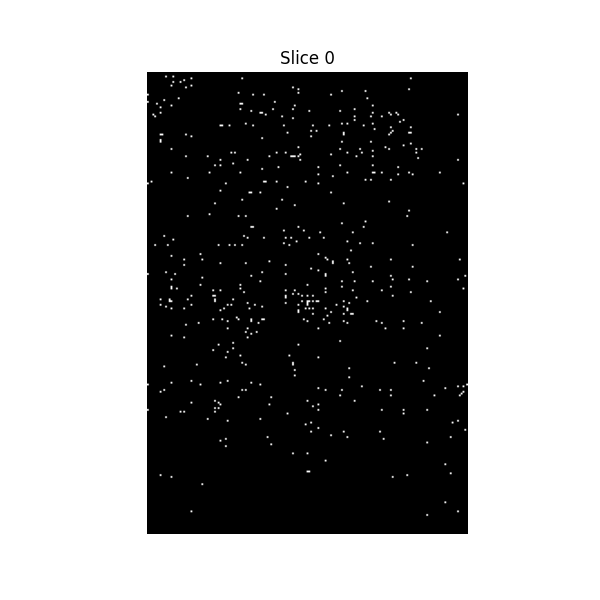

In [54]:
visualize_ct_scan(ct_filepath)

In [55]:
%matplotlib widget
GENERATE_GIF = False
ct_scan_gif = [ generate_gif(ct_scan_filepath, output_filepath=ct_output_filepath) if GENERATE_GIF else ct_output_filepath ][0] 
print(ct_scan_gif)
visualize_gif(ct_scan_gif)

/home/catarina/Documents/GitHub/med_seg_study/outputs/gifs/s0004_ct.gif


In [ ]:

mesh = generate_3d_reconstruction(mask_filepath, id=patient_ID);
reconstruction_path_GT = visualize_mesh(mesh, mask_filepath, id=patient_ID, opacity=1);